# Capacitively coupled CQPS Qubit - 2021
$\textbf{T. Hoenigl-Decrinis}$

CQPS qubit

\begin{equation}
H_q = -\frac{E_S}{2}(|N+1><N|+|N><N+1|)+\frac{(\Phi_{ext}-N \Phi_0)^2}{2 L_k}|N><N|
\end{equation}
where N is the number of fluxes or phase winding number,
$\displaystyle L_k$ is the kinetic inductance

Jaynes-Cummings Hamiltonian

\begin{equation}
H = -\frac{ \omega_q}{2} + \omega_r a^\dagger a + g(a \sigma^+ + a^\dagger \sigma^-)
\end{equation}
where
\begin{equation}
g=\frac{\pi E_S C_k}{2 e} \sqrt{\frac{\hbar\omega}{C_r}}cos k x
\end{equation}

This model can be solved exactly, resulting in the following eigenenergies:

$\displaystyle E_0 = -\frac{1}{2}\omega_q$,

$\displaystyle E_{n\pm} =  \bigg(n-\frac{1}{2}\bigg) \omega_r \pm \sqrt{\frac{\Delta^2}{4}+n g^2}$,

where $\Delta=\omega_r-\omega_q$ and $n=1,2,\ldots$.


In [14]:
%matplotlib notebook
%config InlineBackend.figure_format = 'svg'
import logging

from matplotlib import pyplot as plt
import numpy as np
from numpy import linalg as LA
from matplotlib import cm
from quantum_builder import QuantumBuilder
import scqubits as scq
from scqubits import HilbertSpace, InteractionTerm, ParameterSweep
import dbm
#from importlib import reload
#reload(scq)

plt.style.use('support-files/qubit.mplstyle')

FLUX = float
FLUX_NUMBER = int
cos = np.cos
sin = np.sin
pi = np.pi

fF = 10 ** (-15)
MY_COLOURS = {
    "DarkBlue": "#104e8b",     # dark blue (DodgerBlue4)
    "DarkRed": "#ed2200",     # dark red (red2)
    "Green": "#9acd32",     
    "Orange": "#ffc125",      # orange,
    "LightBlue": "#68838b",  # light steel blue,
    "Purple": "#6959cd",  # dark purple
    "Pink": "#ffa07a"  # pink salmon
}
CMAPS =  ['viridis', 'plasma', 'inferno', 'magma', 'cividis']
COLORMAP_01 = ["#79cdcd", "#eead0e", "#9a37ff", "#00ee76"]
COLORMAP_12 = plt.get_cmap('Reds')
COLORMAP_ENERGY = plt.get_cmap('viridis')
COLORMAP_STATE = plt.get_cmap('hsv')



In [4]:
#Import measurement data

phi0 = 2*10**(-15) #flux quantum
h = 6.64 * 10**(-34) #Plank constant
toGHz = 10**9 #conversion to GHz
eCharge = 1.6 * 10**(-19) #C, electron charge
kb = 1.38 * 10**(-23) # Boltzmann constant
tc = 1.3 #K, critical temperature

deltaold = 2 * 10**(-4) * eCharge
delta = 1.73 * kb * tc

print(deltaold)

print(delta)

R = 3 * 10**3

# EJ = (phi0 * delta / (4 * R * h))

EJ = h / (4 * eCharge**2) * delta / (2 * R * h * toGHz)
EJ

offset = 0.58
scale = 27
#data_podgon = np.loadtxt("D:/Msci_Phisics_Qubit/SIMULATIONS/podgon.txt.txt")
xpod = data_podgon[:,0] * scale - offset
ypod = data_podgon[:,1] / 10**9


ax.plot(xpod, ypod, marker='o')
ax.set_ylim([9,12])

#data_series =
scaling = 0
offset = 0

3.2000000000000003e-23
3.1036199999999993e-23


OSError: D:/Msci_Phisics_Qubit/SIMULATIONS/podgon.txt.txt not found.

cqps_qubit_constant_manager:68:print_constants
⮑  ⚛ System setup with the following parameters (can choose to override them):

Energies
EL:                                               72.05 (GHz)
ES:                                               10.00 (GHz)

Raw Parameters
number_of_states:                                 7
inductive_loop_squares:                           30.00 (100x100nm²)

Derived Parameters
inductance:                                       45.00 (nH)


cqps_qubit_constant_manager:57:override_parameters
⮑  Overriding to the following values:
EL:       13
ES:       3


cqps_qubit_simulator:55:simulate
⮑  💻 Running simulation

cqps_qubit_simulator:96:simulate
⮑  💻 Simulation completed



<IPython.core.display.Javascript object>


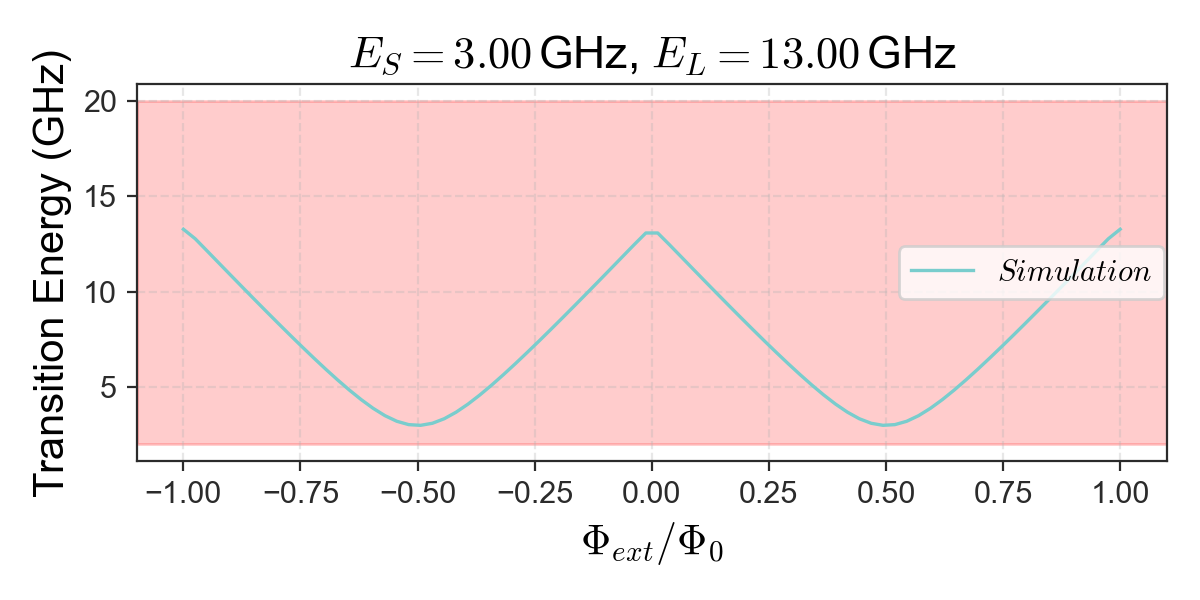

In [5]:
#Single CQPS qubit transition frequencies

SIMULATION_PARAMETERS = {
    "number_of_states": 7,
    "number_of_levels_to_simulate": 2
}
QUBIT_PARAMETERS = {
    "ES": 10,
    "inductive_loop_squares": 30, # 30 140x140nm squares
     **SIMULATION_PARAMETERS
}

cqps_qubit = QuantumBuilder.build_cqps_qubit(
    QUBIT_PARAMETERS, logging_level=logging.INFO,
)

#Simulation
FLUX_NUMBER = np.linspace(-1, 1, 80)
EL = 13
ES = 3
cqps_qubit.cqps_qubit_constant_manager.override_parameters(EL, ES)
simulation = cqps_qubit.run_simulation(
    FLUX_NUMBER, SIMULATION_PARAMETERS["number_of_levels_to_simulate"])

t01 = simulation["eigvals"][:, 1] - simulation["eigvals"][:, 0] #first transition


#Plot simulation and spectrum
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
#data_graph, = ax.plot(data_series[:, 0] * scaling - offset, data_series[:, 1],
#        marker="o",
#        color=FILES[series],
#        markeredgecolor="#fb2c07",
#        markeredgewidth="0.4",
#        markersize=5,
#        alpha=0.95,
#        linestyle="")
simulation_graph, = ax.plot(
    FLUX_NUMBER, t01,linestyle="-",
           color=COLORMAP_01[0],
           label="$Simulation$"
)

ax.set_title(f"$E_S={cqps_qubit.cqps_qubit_constant_manager.ES:.2f}\,$GHz, $E_L={cqps_qubit.cqps_qubit_constant_manager.EL:.2f}\,$GHz", fontsize=16)
ax.set_ylabel("Transition Energy (GHz)", fontsize=15)
ax.set_xlabel("$\Phi_{ext}/\Phi_0$", fontsize=15)
ax.legend(loc="center right",
           borderaxespad=0.1)
ax.axhspan(2, 20, color='red', alpha=0.2)

plt.tight_layout()

## Jaynes-Cumming example

In [6]:
# exact eigenenergies for comparing with numerics

def energies(omega_r, omega_q, g, n_cutoff):
    delta = omega_r - omega_q
    energies1 = (np.arange(1, n_cutoff) - 0.5) * omega_r
    energies2 = np.sqrt(delta**2/4 + np.arange(1, n_cutoff) * g**2)
    energies_plus = energies1 + energies2
    energies_minus = energies1 - energies2
    energies_0 = np.asarray([[-0.5 * omega_q]])
    all_energies = np.append(energies_0, energies_minus)
    all_energies = np.append(all_energies, energies_plus)
    return np.sort(all_energies)



In [7]:
#Set up the subsystem
omega_q = 1.0
omega_r = 0.8
g = 0.1


qubit = scq.GenericQubit(E=omega_q)

osc = scq.Oscillator(
    E_osc=omega_r,
    truncated_dim=10  # up to 9 photons
)

### Set up Hilbert space


In [8]:
# Form a list of all components making up the Hilbert space.
hilbertspace = HilbertSpace([qubit, osc])

hilbertspace.add_interaction(
    g_strength = g,
    op1 = qubit.sm_operator,
    op2 = osc.creation_operator,
    add_hc = True
)

In [21]:
print(hilbertspace)

HilbertSpace:  subsystems
-------------------------

GenericQubit--------|
                    | E: 1.0
                    |
                    | dim: 2


Oscillator----------|
                    | E_osc: 0.8
                    | l_osc: None
                    | truncated_dim: 10
                    |
                    | dim: 10



HilbertSpace:  interaction terms
--------------------------------

InteractionTerm----------|
                         | g_strength: 0.1
                         | operator_list: [(0, array([[0., 0.],
       [1., 0.]])), (1, arra ...
                         | add_hc: True




In [9]:
evals = hilbertspace.eigenvals(evals_count=5)
print(evals)

[-0.5         0.25857864  0.54142136  1.02679492  1.37320508]


In [10]:
energies(omega_r, omega_q, g, 3)

array([-0.5       ,  0.25857864,  0.54142136,  1.02679492,  1.37320508])

## Avoided crossings simulations

1. First find qubit $\Delta$ at different magnetic fields

2. Evaluate eigenvalues of the following matrix at different fields

\begin{equation}
  \mathcal{H}_{middle} = \begin{pmatrix}
    \Delta E + N\hbar\omega_r & \hbar g\sqrt{N+1}\\
    \hbar g\sqrt{N+1} & (N+1)\hbar\omega_r
  \end{pmatrix}
\end{equation}

USE `N = 0`

\begin{equation}
  \mathcal{H}_{middle} = \begin{pmatrix}
    \Delta E & \hbar g\\
    \hbar g & \hbar\omega_r
  \end{pmatrix}
\end{equation}

This will give the energy difference between states

\begin{equation}
\frac{\left|e, N\right\rangle - \left|g, N+1\right\rangle}{\sqrt{2}}  \quad \text{with energy } E_{high}
\end{equation}

and 

\begin{equation}
\frac{\left|e, N\right\rangle + \left|g, N+1\right\rangle}{\sqrt{2}}  \quad \text{with energy } E_{low}
\end{equation}

and plot $E_{high}(\Phi)$ and $E_{low}(\Phi)$



<IPython.core.display.Javascript object>


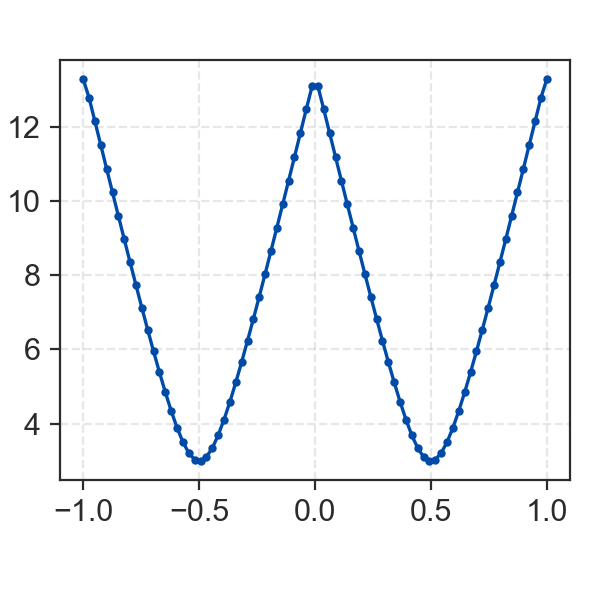

<IPython.core.display.Javascript object>


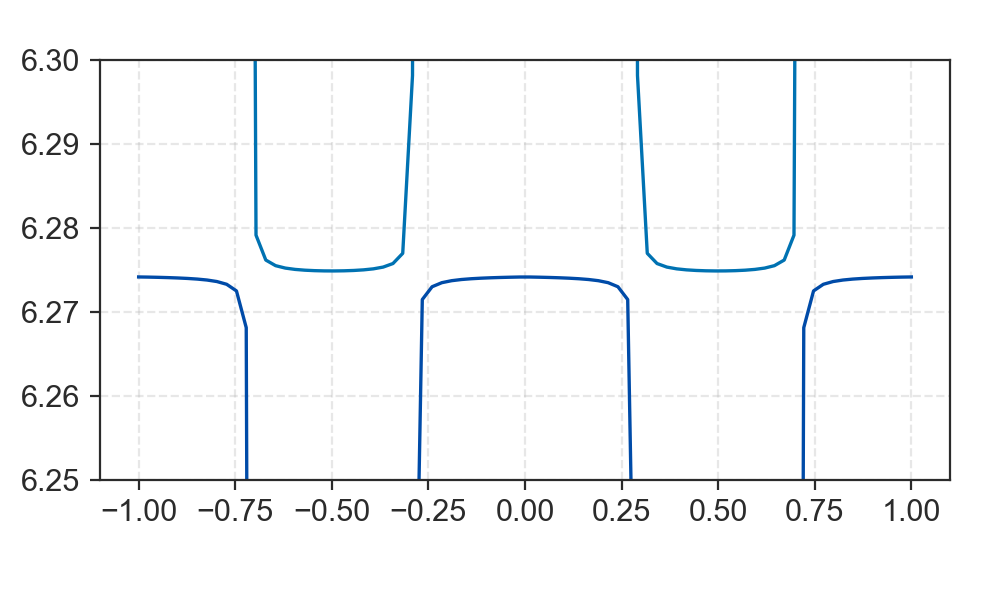

(6.25, 6.3)

In [7]:
# Step 1: First find qubit  Δ  at different magnetic fields

flux_list = FLUX_NUMBER 
deltaE_list = t01

fix, ax = plt.subplots(1, 1, figsize=(3,3))

ax.plot(flux_list, deltaE_list, marker='o')

# Step 2: Evaluate eigenvalues of the following matrix at differnet fields

omega_r = 6.2744 #GHz, resonator frequency
g = 0.04 #coupling

e_high = []
e_low = []
for dE in deltaE_list:
    a = dE
    b = g
    c = omega_r
    
    factor = np.sqrt(a**2 + 4*b**2 - 2*a*c + c**2)
    e_high.append((a+c+factor)/2)
    e_low.append((a+c-factor)/2)
    
fix, ax = plt.subplots(1, 1, figsize=(5,3))

# ax.plot(flux_list, np.array(e_high) - np.array(e_low))
ax.plot(flux_list, e_low)
ax.plot(flux_list, e_high)
ax.set_ylim([6.25, 6.30])

## The Master equation

To model the transmission, we consider the density matrix $\rho$ and solve the master equation $\dot{\rho} = -\frac{i}{\hbar}[H,\rho]+L[\rho]$ for the stationary case ($\dot\rho = 0)$. 

The dissipative Lindblad term $L = L_r + L_q$ presents photon loss in the resonator, $L_r = \frac{\kappa}{2}(2a\rho a^{\dagger}-a^{\dagger}a\rho-\rho a^{\dagger}a)$, and qubit decoherence, $L_q = \frac{\gamma_1}{2}(2\sigma^- \rho a^{\dagger}-a^{\dagger}\sigma^- \rho - \rho\sigma^+\sigma^-) +\frac{\gamma_{\phi}}{2} (\sigma_z\rho\sigma_z-\rho)$ where $\sigma^{\pm}=(\sigma_x \pm i\sigma_y)/2$ and $\gamma_1, \gamma_{\phi}$ is the relaxation and dephasing rate of the qubit respectively.

In the limit of small driving amplitudes with the mean photon number in the resonator
$⟨a^{\dagger}a⟩ ≪ 1$, the photon space can be truncated to two states.



In [27]:
from wolframclient.language import wl

###   Example: Lindblad Master Equation

Consider a two-level atom coupled to a leaky single-mode cavity through a dipole-type interaction, which supports a coherent exchange of quanta between the two systems. If the atom initially is in its groundstate and the cavity in a 5-photon Fock state, the dynamics is calculated with the lines following code:

In [30]:
import qutip as qt

times = np.linspace(0.0, 10.0, 200)

psi0 = qt.tensor(qt.fock(2,0), qt.fock(10, 5))

a  = qt.tensor(qt.qeye(2), qt.destroy(10))

sm = qt.tensor(qt.destroy(2), qt.qeye(10))

H = 2 * np.pi * a.dag() * a + 2 * np.pi * sm.dag() * sm + 2 * np.pi * 0.25 * (sm * a.dag() + sm.dag() * a)

result = qt.mesolve(H, psi0, times, [np.sqrt(0.1)*a], [a.dag()*a, sm.dag()*sm])

plt.figure()
plt.plot(times, result.expect[0])
plt.plot(times, result.expect[1])
plt.xlabel('Time')
plt.ylabel('Expectation values')
plt.legend(("cavity photon number", "atom excitation probability"))
plt.show()

<IPython.core.display.Javascript object>